In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.isnull().sum()
#There is no null values

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [7]:
X = df.drop('label',axis=1)
Y=df['label']
X_test= test

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
print(X_scaled)
print(X.shape)
print(Y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(42000, 784)
0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


In [9]:
X_train,X_valid,y_train,y_valid = train_test_split(X_scaled,Y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print(type(X_train))
print(type(X_valid))
print(type(y_train))
print(type(y_valid))
y_train_numpy=y_train.to_numpy()
y_valid_numpy=y_valid.to_numpy()

(33600, 784)
(8400, 784)
(33600,)
(8400,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


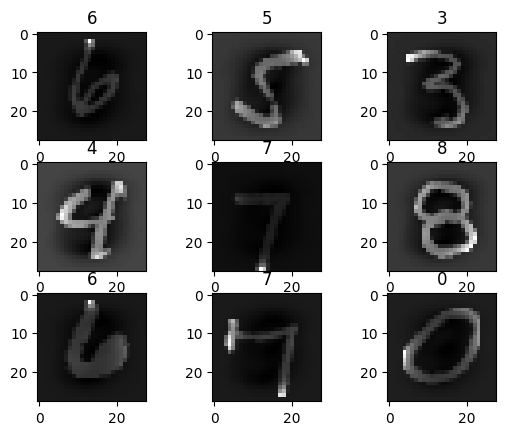

In [10]:
X_train_display=X_train
X_train_display = X_train_display.reshape(X_train_display.shape[0], 28, 28)
for i in range(9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train_display[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train_numpy[i])

In [11]:
#Building model 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.optimizers import Adam
model = keras.Sequential([
    layers.Dense(units=784,activation='relu'),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=10,activation='linear')
])
model.compile(loss = SparseCategoricalCrossentropy(from_logits=True),optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8066 - loss: 1.1095
Epoch 2/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7722 - loss: 0.8938
Epoch 3/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6475 - loss: 1.1869
Epoch 4/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5589 - loss: 1.3511
Epoch 5/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5709 - loss: 1.3398
Epoch 6/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5135 - loss: 1.4500
Epoch 7/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5388 - loss: 1.3604
Epoch 8/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5310 - loss: 1.2967
Epoch 9/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5070 - loss: 1.4840
Epoch 10/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5156 - loss: 1.3502
Epoch 11/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5388 - loss: 1.3130
Epoch 12/100
1050/1

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (32, 784)                   │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 512)                   │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 10)                    │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,067,472 (11.70 MB)

 Trainable params: 1,022,490 (3.90 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,044,982 (7.80 MB)

In [13]:
eva_first_model = model.evaluate(X_train,y_train)
print(f"Evaluation of first model on training set: {eva_first_model}")

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.5504 - loss: 1.1812
Evaluation of first model on training set: [1.177032470703125, 0.5505654811859131]


In [14]:
eva_first_model_cv = model.evaluate(X_valid,y_valid)
print(f"Evaluation of first model on cross-validation set: {eva_first_model_cv}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.5424 - loss: 3.5068
Evaluation of first model on cross-validation set: [2.9702792167663574, 0.5404762029647827]


In [15]:
second_model = keras.Sequential([
    layers.Dense(units=40,activation='relu'),
    layers.Dense(units=30,activation='relu'),
    layers.Dense(units=10,activation='linear')
])
second_model.compile(loss = SparseCategoricalCrossentropy(from_logits=True),optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
second_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - accuracy: 0.8013 - loss: 0.6471
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 500us/step - accuracy: 0.9561 - loss: 0.1476
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 500us/step - accuracy: 0.9685 - loss: 0.1050
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - accuracy: 0.9769 - loss: 0.0724
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - accuracy: 0.9798 - loss: 0.0604
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - accuracy: 0.9855 - loss: 0.0457
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 500us/step - accuracy: 0.9881 - loss: 0.0370
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - accuracy: 0.9898 - loss: 0.0316
Epoch 9/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - accuracy: 0.9925 - loss: 0.0233
Epoch 10/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - accuracy: 0.9927 - loss: 0.0218


In [16]:
second_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (32, 40)                    │          31,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 30)                    │           1,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (32, 10)                    │             310 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,822 (386.03 KB)

 Trainable params: 32,940 (128.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 65,882 (257.36 KB)

In [17]:
eva_second_model = second_model.evaluate(X_train,y_train)
print(f"Evaluation of fsecond model on training set: {eva_second_model}")
eva_second_model_cv = second_model.evaluate(X_valid,y_valid)
print(f"Evaluation of second model on cross-validation set: {eva_second_model_cv}")

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.9939 - loss: 0.0195
Evaluation of fsecond model on training set: [0.018257424235343933, 0.9943452477455139]
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.9630 - loss: 0.1917
Evaluation of second model on cross-validation set: [0.20152176916599274, 0.961309552192688]


In [18]:
third_model = keras.Sequential([
    layers.Dense(units=5,activation='relu'),
    layers.Dense(units=15,activation='relu'),
    layers.Dense(units=15,activation='relu'),
    layers.Dense(units=10,activation='linear')
])
third_model.compile(loss = SparseCategoricalCrossentropy(from_logits=True),optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
third_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.5301 - loss: 1.3750
Epoch 2/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - accuracy: 0.8469 - loss: 0.5137
Epoch 3/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - accuracy: 0.8686 - loss: 0.4459
Epoch 4/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - accuracy: 0.8833 - loss: 0.3981
Epoch 5/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step - accuracy: 0.8905 - loss: 0.3790
Epoch 6/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 470us/step - accuracy: 0.8964 - loss: 0.3504
Epoch 7/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 488us/step - accuracy: 0.8963 - loss: 0.3450
Epoch 8/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.9004 - loss: 0.3366
Epoch 9/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 481us/step - accuracy: 0.9009 - loss: 0.3351
Epoch 10/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.9067 - loss: 0.3216
Epoch 11/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.9064 - loss: 0.31

In [19]:
eva_third_model = third_model.evaluate(X_train,y_train)
print(f"Evaluation of third model on training set: {eva_third_model}")
eva_third_model_cv = third_model.evaluate(X_valid,y_valid)
print(f"Evaluation of third model on cross-validation set: {eva_third_model_cv}")

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.9333 - loss: 0.2203
Evaluation of third model on training set: [0.22324280440807343, 0.932440459728241]
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.8948 - loss: 0.4049
Evaluation of third model on cross-validation set: [0.40038028359413147, 0.8951190710067749]


In [20]:
fourth_model = keras.Sequential([
    layers.Dense(units=10,activation='relu'),
    layers.Dense(units=10,activation='relu'),
    layers.Dense(units=10,activation='linear')
])
fourth_model.compile(loss = SparseCategoricalCrossentropy(from_logits=True),optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
fourth_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - accuracy: 0.6461 - loss: 1.0831
Epoch 2/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.9052 - loss: 0.3251
Epoch 3/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.9209 - loss: 0.2653
Epoch 4/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.9294 - loss: 0.2363
Epoch 5/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.9318 - loss: 0.2232
Epoch 6/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.9339 - loss: 0.2148
Epoch 7/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.9402 - loss: 0.1959
Epoch 8/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.9429 - loss: 0.1927
Epoch 9/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.9447 - loss: 0.1882
Epoch 10/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.9468 - loss: 0.1769
Epoch 11/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.9492 - loss: 0.17

In [21]:
eva_fourth_model = fourth_model.evaluate(X_train,y_train)
print(f"Evaluation of fourth model on training set: {eva_fourth_model}")
eva_fourth_model_cv = fourth_model.evaluate(X_valid,y_valid)
print(f"Evaluation of fourth model on cross-validation set: {eva_fourth_model_cv}")


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9727 - loss: 0.0891
Evaluation of fourth model on training set: [0.08941154181957245, 0.9725595116615295]
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9138 - loss: 0.5763
Evaluation of fourth model on cross-validation set: [0.581214427947998, 0.9102380871772766]


In [22]:
fifth_model = keras.Sequential([
    layers.Dense(units=15,activation='relu'),
    layers.Dense(units=15,activation='relu'),
    layers.Dense(units=10,activation='linear')
])
fifth_model.compile(loss = SparseCategoricalCrossentropy(from_logits=True),optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
fifth_model.fit(X_train,y_train,epochs=25)

Epoch 1/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - accuracy: 0.7028 - loss: 0.9477
Epoch 2/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.9259 - loss: 0.2543
Epoch 3/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.9387 - loss: 0.2031
Epoch 4/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - accuracy: 0.9486 - loss: 0.1647
Epoch 5/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.9559 - loss: 0.1463
Epoch 6/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.9565 - loss: 0.1368
Epoch 7/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 508us/step - accuracy: 0.9637 - loss: 0.1220
Epoch 8/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 522us/step - accuracy: 0.9641 - loss: 0.1138
Epoch 9/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - accuracy: 0.9647 - loss: 0.1077
Epoch 10/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 481us/step - accuracy: 0.9670 - loss: 0.1009
Epoch 11/25
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.9692 - loss: 0.0927
Epoch 12

In [23]:
eva_fifth_model = fifth_model.evaluate(X_train,y_train)
print(f"Evaluation of fifth model on training set: {eva_fifth_model}")
eva_fifth_model_cv = fifth_model.evaluate(X_valid,y_valid)
print(f"Evaluation of fifth model on cross-validation set: {eva_fifth_model_cv}")

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.9816 - loss: 0.0541
Evaluation of fifth model on training set: [0.055157873779535294, 0.9815475940704346]
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.9354 - loss: 0.3436
Evaluation of fifth model on cross-validation set: [0.33504772186279297, 0.9357143044471741]


In [24]:
# The best fitting model is seocnd one, so i chose it as main model
from sklearn.metrics import confusion_matrix
main_model=second_model
predictions = main_model.predict(X_valid)
pred_valid=[]
for i in range(predictions.shape[0]):
    #print(np.argmax(predictions[i]))
    pred_valid.append(np.argmax(predictions[i]))
print(y_valid.shape)
pred_valid=np.array(pred_valid)
print(pred_valid.shape)
confusion_matrix(y_valid,pred_valid)

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
(8400,)
(8400,)


array([[801,   0,   1,   1,   1,   2,   4,   4,   1,   1],
       [  0, 895,   4,   1,   0,   2,   0,   3,   4,   0],
       [  2,   6, 806,   8,   5,   3,   4,   2,   7,   3],
       [  2,   2,   1, 886,   0,  20,   2,   7,  11,   6],
       [  5,   0,   3,   1, 792,   3,   6,   4,   2,  23],
       [  2,   1,   2,  11,   0, 665,   8,   1,   9,   3],
       [  9,   1,   1,   2,   1,   3, 767,   0,   1,   0],
       [  0,   1,   5,   3,   5,   2,   0, 867,   2,   8],
       [  0,   6,   2,   9,   8,   8,   4,   3, 792,   3],
       [  3,   1,   1,   6,   4,   2,   0,  13,   4, 804]], dtype=int64)

In [25]:
print(y_valid[30:45])
print(pred_valid[30:45])

22756    6
27933    6
16135    1
37896    9
9803     8
26670    6
21373    7
14723    3
22941    6
27652    1
16906    9
41034    7
36782    9
11898    6
18707    8
Name: label, dtype: int64
[6 6 1 2 8 6 7 3 6 1 9 7 9 6 8]


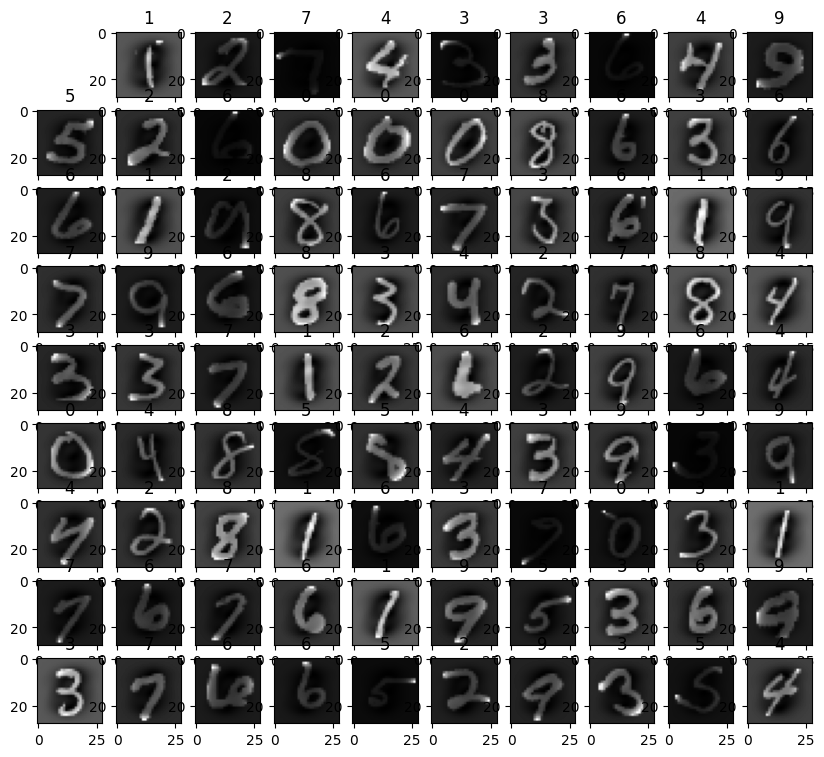

In [26]:
X_valid_display = X_valid.reshape(X_valid.shape[0], 28, 28)
fig=plt.figure(figsize=(10,10))
cols=10
rows=10
for i in range(12,cols*rows+1):
    fig.add_subplot(rows,cols,i)
    plt.imshow(X_valid_display[i], cmap=plt.get_cmap('gray'))
    plt.title(pred_valid[i])